# 이미지 -> 정사각형 변화

## 방법
1. Padding
2. Cropping
3. Warpping

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

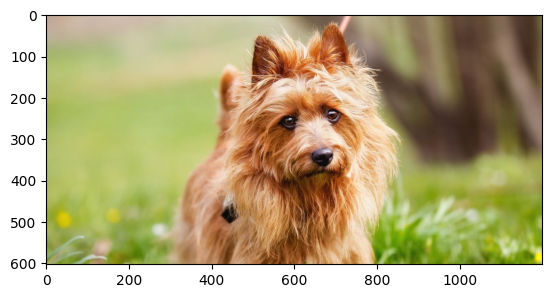

In [ ]:
dog_img = image.load_img('/content/dog.jpeg')
dog_vector = np.asarray(image.img_to_array(dog_img))
dog_vector = dog_vector/255
plt.imshow(dog_vector)

## Padding

In [ ]:
dog_vector.shape

(603, 1200, 3)

In [ ]:
# 목표 크기 설정
target_height = 1200
target_width = 1200

# 원본 이미지 크기 추출:
source_height = dog_vector.shape[0]
source_width = dog_vector.shape[1]


In [ ]:
print(source_height, source_width)

603 1200


In [ ]:
dog_vector_pad = pad_to_bounding_box(dog_vector, int((target_height-source_height)/2),int((target_width-source_width)/2),
                               target_height, target_width)

# 패딩 시작 위치 계산:int((target_height - source_height) / 2)
#                      int((target_width - source_width) / 2)
  # 패딩을 적용하기 시작할 상단(top)과 왼쪽(left) 위치 계산
  # 이미지가 타겟 박스의 중앙에 오도록 계산,
  # 패딩은 상단과 왼쪽, 하단과 오른쪽에 균등하게 적용.


In [ ]:
print(int((target_height - source_height) / 2), int((target_width - source_width) / 2))

298 0


In [ ]:
dog_vector_pad.shape

TensorShape([1200, 1200, 3])

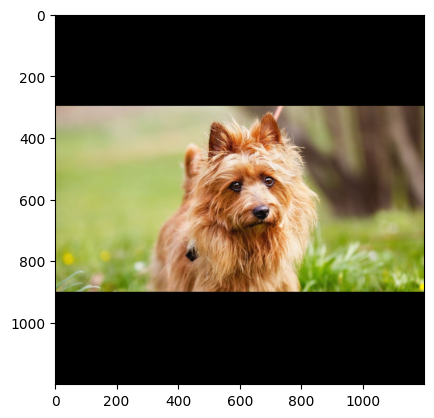

In [ ]:
plt.imshow(dog_vector_pad)
plt.show()

In [ ]:
image.save_img('dog_pad.png', dog_vector_pad)

## Cropping

이미지의 가운데를 중심으로 crop <br>
1. central_crop 함수 <br>
2. (좌표) 직접 계산 방법

In [ ]:
# 방법1
# crop 1 : 이미지의 중앙 부분을 원본 크기의 50%로 크로핑, (정사각형 모양은 아님)
dog_vector_crop = central_crop(dog_vector, .5)
   # .5 크로핑 비율(.5 = 50%)


In [ ]:
dog_vector.shape

(603, 1200, 3)

기대하는 결과값 <br>
원치수: (603, 1200, 3) 높이 = 603, 너비 = 1200<br>
<br>
자르기 비율: 0.5 (중앙을 중심으로 원 높이와 너비의 50%를 유지)
<br>
<br>
계산: <br>
새로운 높이 = 원 높이 × 자르기 비율 = 603 × 0.5 ≒ 301.5<br>
새로운 너비 = 원 너비 × 자르기 비율 = 1200 × 0.5 = 600

In [ ]:
dog_vector_crop.shape

TensorShape([303, 600, 3])

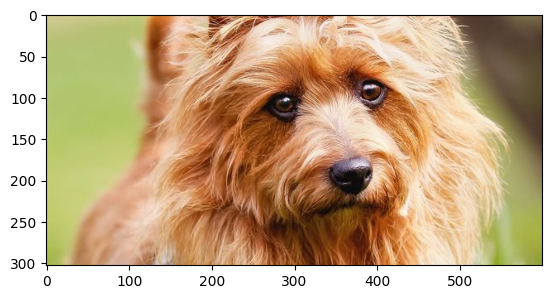

In [ ]:
plt.imshow(dog_vector_crop)
plt.show()

In [ ]:
# 2. (좌표) 직접 계산 방법

import tensorflow as tf

# crop 비율
fraction = 0.5

# 비율을 적용하여 새로운 shape 계산:
new_height = int(dog_vector.shape[0] * fraction)
new_width = int(dog_vector.shape[1] * fraction)

# Center Cropping :
start_height = (dog_vector.shape[0] - new_height) // 2
start_width = (dog_vector.shape[1] - new_width) // 2

dog_vector_crop = tf.image.crop_to_bounding_box(
    dog_vector,
    offset_height=start_height,
    offset_width=start_width,
    target_height=new_height,
    target_width=new_width
)

print(dog_vector_crop.shape)

(301, 600, 3)


In [ ]:
# crop 2 : 정사각형 모양으로 crop
# 가로와 세로 중 짧은 길이를 이용해서 정사각형으로 cropping

img = image.load_img('/content/dog.jpeg')
w, h = img.size #  이미지의 가로(w)와 세로(h) 길이를 튜플 형태로 반환
s = min(w, h) # 가로와 세로 중 더 짧은 길이를 선택, 크로핑할 정사각형의 한 변의 길이(s)로 설정
y = (h - s) // 2
x = (w - s) // 2
   # 크로핑할 정사각형의 상단 좌측 모서리(x, y)를 계산
   # 이미지의 중앙에 정사각형이 위치하도록 조정


In [ ]:
print(w, h, x, y, s)


1200 603 298 0 603


In [ ]:
img = img.crop((x, y, x+s, y+s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
# crop() : (x, y, x+s, y+s) 튜플을 인자로 받아, 크로핑할 영역의 좌상단 모서리(x, y)와 우하단 모서리(x+s, y+s)를 지정



In [ ]:
print(x, y, x+s, y+s)

298 0 901 603


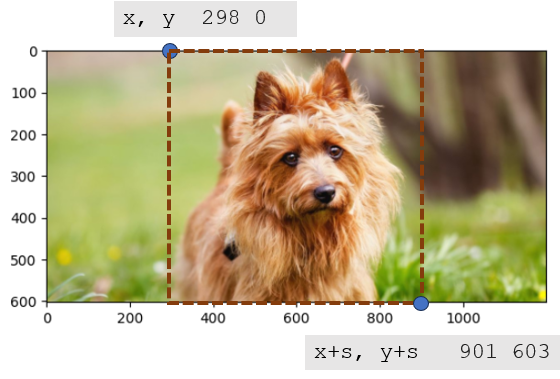

(603, 603)

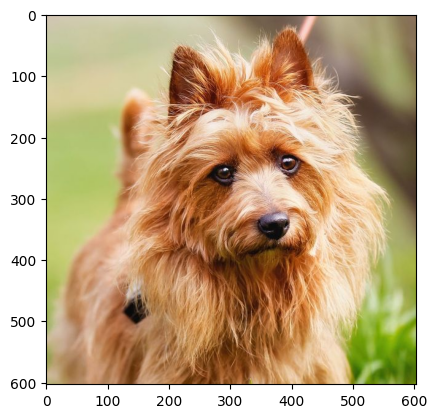

In [ ]:
plt.imshow(np.asarray(img))
img.size

## Warping

In [ ]:
dog_vector_resize = resize(dog_vector, (300,300))

In [ ]:
dog_vector_resize.shape

TensorShape([300, 300, 3])

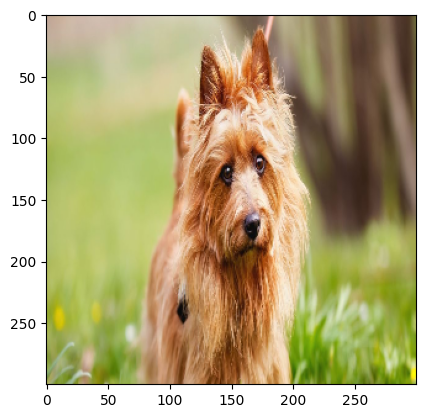

In [ ]:
plt.imshow(dog_vector_resize)